In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input
from load_data import load_train, load_test

## CNN bouwen

In [2]:
# Het importeren en bewerken van de data 
train_images, train_labels = load_train()
test_images, test_labels = load_test()

# Normalizeren van de images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshapen van de images zodat ze de juiste dimensies hebben
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [5]:
# Onze CNN

# Stap 1: bepaal hoeveel filters je wilt, hoe groot je filter size moet zijn (let op je filter size mag niet te groot zijn vergeleken met je images), en wat je pool size is. 
num_filters = 32
filter_size = 3
pool_size = 2

# Stap 2: maak het model.
#    In de array die je aan sequential meegeeft, zet je alle layers die in het model moeten:
#    Conv2D, parameters: num_filters, filter_size, input_shape=(x, y, z)
#    MaxPooling2D, parameters: pool_size=pool_size
#    Flatten,
#    Dense, parameters: aantal outputs, activation='softmax'

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 31, 1), activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 29, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5824)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               745600    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 747,210
Trainable params: 747,210
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Stap 3: het compilen van het model. 
# model.compile parameters: 'adam', loss='categorial_crossentropy', metrics=['accuracy']
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert train_labels and test_labels to categorical
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)


# Check the shapes of train_images and test_images
print("train_images shape:", train_images.shape)
print("test_images shape:", test_images.shape)

model.fit(train_images, train_labels_categorical, epochs=3, validation_data=(test_images, test_labels_categorical))

train_images shape: (60000, 28, 31, 1)
test_images shape: (10000, 28, 31, 1)
Epoch 1/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1738 - accuracy: 0.9489 - val_loss: 0.7204 - val_accuracy: 0.7704
Epoch 2/3
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.8142 - val_accuracy: 0.7403
Epoch 3/3
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.7184 - val_accuracy: 0.7848


In [7]:
# Stap 5: evalueer het model
test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.7184 - accuracy: 0.7848
0.7847999930381775


In [10]:
# Stap 6: extra layer(s). Wat gebeurt er als je een extra Conv Layer toevoegd aan je model? 
#    Voeg een extra layer(s) toe en train het model opnieuw. 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 31, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Stap 7: parameters. Wat gebeurt er bijvoorbeeld als je geen softmax gebruikt maar een andere activatie? 
#    Pas op z'n minst 1 parameter aan en train je model opnieuw. 

model = Sequential([
   Conv2D(32, (3, 3), activation='relu', input_shape=(28, 31, 1)),
   MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))


Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1432 - accuracy: 0.9558 - val_loss: 0.6562 - val_accuracy: 0.7910
Epoch 2/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.3419 - val_accuracy: 0.8855
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.4285 - val_accuracy: 0.8594
Epoch 1/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1668 - accuracy: 0.9482 - val_loss: 0.3900 - val_accuracy: 0.8754
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.2465 - val_accuracy: 0.9264
Epoch 3/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.3370 - val_accuracy: 0.8795


## CIFAR-10

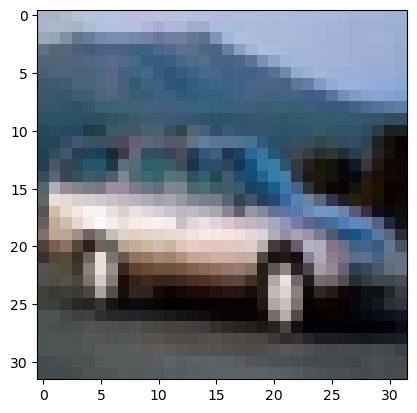

In [17]:
# Data inladen
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

plt.imshow(train_images10[4])
plt.show()

# Normalizeren
train_images10, test_images10 = train_images10 / 255.0, test_images10 / 255.0

In [18]:
# Stap 8: bouw je eigen CNN voor de CIFAR-10 dataset. 
# Tip: gebruik meerdere Conv2D en MaxPooling layers
# LET OP: gebruik 'softmax' alleen bij je laatste Dense layer. Gebruik 'relu' voor de andere Conv2D/Dense layers. 
model_cif = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_cif.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
# Reset Tensorflow session
from tensorflow.keras import backend as K
K.clear_session()

model_cif.fit(
    train_images10,
    to_categorical(train_labels10),
    epochs=10,  
    validation_data=(test_images10, to_categorical(test_labels10)),
)

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5067 - accuracy: 0.4530 - val_loss: 1.2432 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1326 - accuracy: 0.5988 - val_loss: 1.0298 - val_accuracy: 0.6320
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9789 - accuracy: 0.6540 - val_loss: 0.9956 - val_accuracy: 0.6459
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8842 - accuracy: 0.6888 - val_loss: 0.9346 - val_accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8144 - accuracy: 0.7151 - val_loss: 0.8638 - val_accuracy: 0.7025
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7494 - accuracy: 0.7367 - val_loss: 0.8664 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7002 - accuracy: 0.7548 - val_loss: 0.8509 -

In [20]:
test_loss, test_acc = model_cif.evaluate(test_images10,  to_categorical(test_labels10), verbose=2)

313/313 - 2s - loss: 0.9029 - accuracy: 0.7066


In [21]:
print(test_acc)

0.70660001039505


## Bronnen
* https://victorzhou.com/blog/keras-cnn-tutorial/ Bezocht: 9/3/2020
* https://www.tensorflow.org/tutorials/images/cnn Bezocht: 13/3/2020